# 🧠 Reinforcement Learning Fundamentals: MDP Framework

## Day 1 - Afternoon Session

Welcome to the world of **Markov Decision Processes (MDPs)**! Today we'll explore the mathematical foundation that underlies all reinforcement learning algorithms.

### 🎯 Learning Objectives
By the end of this session, you will understand:
- What is a Markov Decision Process (MDP)
- States, Actions, and Transitions
- Reward Functions and Value Functions
- Policy and Optimal Policy
- Bellman Equations

### 🧊 Our Environment: FrozenLake
We'll use the **FrozenLake** environment - a perfect example to understand MDP concepts!

---

In [2]:
# Import required libraries
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import pandas as pd
from IPython.display import display, HTML, clear_output
import time
import warnings
warnings.filterwarnings('ignore')

# Set up plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📚 Libraries imported successfully!")
print("🧊 Ready to explore the FrozenLake MDP!")

📚 Libraries imported successfully!
🧊 Ready to explore the FrozenLake MDP!


## 1. 🧊 Introduction to FrozenLake Environment

FrozenLake is a classic RL environment that represents a frozen lake with:
- **S**: Safe frozen surface (can walk on)
- **F**: Frozen surface (safe)
- **H**: Hole (fall in and lose!)
- **G**: Goal (reach here to win!)

### The Challenge
Navigate from start (top-left) to goal (bottom-right) without falling into holes!

But there's a twist: **the ice is slippery!** 🧊
- When you choose an action, you might slip and go in a different direction
- This introduces **stochasticity** - a key concept in MDPs

In [6]:
# Create and explore the FrozenLake environment
def create_frozen_lake_env(slippery=True, size="4x4"):
    """Create FrozenLake environment with visualization"""
    if size == "4x4":
        env = gym.make('FrozenLake-v1', is_slippery=slippery, render_mode='ansi')
    else:
        env = gym.make('FrozenLake-v1', is_slippery=slippery, render_mode='ansi', map_name="8x8")
    
    return env

def visualize_frozen_lake(env):
    """Visualize the FrozenLake environment"""
    print("🧊 FrozenLake Environment Layout:")
    print("=" * 40)
    
    # Reset environment to get initial state
    env.reset()
    print(env.render())
    
    print("\n📖 Legend:")
    print("  S = Start position (safe)")
    print("  F = Frozen surface (safe to walk)")
    print("  H = Hole (game over if you fall in!)")
    print("  G = Goal (reach here to win!)")
    print("  🔴 = Current agent position")
    
    print("\n🎮 Available Actions:")
    print("  0 = LEFT  ⬅️")
    print("  1 = DOWN  ⬇️")
    print("  2 = RIGHT ➡️")
    print("  3 = UP    ⬆️")

# Create environment
env = create_frozen_lake_env(slippery=True)
visualize_frozen_lake(env)

print(f"\n📊 Environment Properties:")
print(f"  State Space Size: {env.observation_space.n}")
print(f"  Action Space Size: {env.action_space.n}")
print(f"  Slippery: Yes (stochastic transitions)")

🧊 FrozenLake Environment Layout:

SFFF
FHFH
FFFH
HFFG


📖 Legend:
  S = Start position (safe)
  F = Frozen surface (safe to walk)
  H = Hole (game over if you fall in!)
  G = Goal (reach here to win!)
  🔴 = Current agent position

🎮 Available Actions:
  0 = LEFT  ⬅️
  1 = DOWN  ⬇️
  2 = RIGHT ➡️
  3 = UP    ⬆️

📊 Environment Properties:
  State Space Size: 16
  Action Space Size: 4
  Slippery: Yes (stochastic transitions)


## 2. 🔄 Understanding Markov Decision Processes (MDPs)

An MDP is defined by a tuple: **(S, A, P, R, γ)**

Let's break this down:

### 🏠 **S**: State Space
- All possible situations the agent can be in
- In FrozenLake: each cell position (0-15 for 4x4 grid)

### 🎮 **A**: Action Space  
- All possible actions the agent can take
- In FrozenLake: {LEFT, DOWN, RIGHT, UP}

### 🎲 **P**: Transition Probabilities
- P(s'|s,a) = probability of reaching state s' from state s taking action a
- This is where the "slippery" ice comes in!

### 🎁 **R**: Reward Function
- R(s,a,s') = immediate reward for transition
- In FrozenLake: +1 for reaching goal, 0 otherwise

### ⏰ **γ**: Discount Factor
- How much we value future rewards (0 ≤ γ ≤ 1)
- γ = 0.9 means future reward worth 90% of immediate reward

In [7]:
# Let's examine the MDP components of FrozenLake
def analyze_mdp_components(env):
    """Analyze and display MDP components"""
    print("🔍 MDP COMPONENT ANALYSIS")
    print("=" * 50)
    
    # State Space (S)
    print(f"\n🏠 STATE SPACE (S):")
    print(f"   Size: {env.observation_space.n} states")
    print(f"   States: {list(range(env.observation_space.n))}")
    
    # Convert state number to grid position
    def state_to_position(state, grid_size=4):
        row = state // grid_size
        col = state % grid_size
        return (row, col)
    
    print(f"\n   Grid Positions:")
    for state in range(min(16, env.observation_space.n)):
        pos = state_to_position(state)
        print(f"     State {state:2d} → Position {pos}")
    
    # Action Space (A)
    print(f"\n🎮 ACTION SPACE (A):")
    print(f"   Size: {env.action_space.n} actions")
    action_names = {0: "LEFT", 1: "DOWN", 2: "RIGHT", 3: "UP"}
    for action in range(env.action_space.n):
        print(f"     Action {action}: {action_names[action]}")
    
    return action_names

action_names = analyze_mdp_components(env)

🔍 MDP COMPONENT ANALYSIS

🏠 STATE SPACE (S):
   Size: 16 states
   States: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

   Grid Positions:
     State  0 → Position (0, 0)
     State  1 → Position (0, 1)
     State  2 → Position (0, 2)
     State  3 → Position (0, 3)
     State  4 → Position (1, 0)
     State  5 → Position (1, 1)
     State  6 → Position (1, 2)
     State  7 → Position (1, 3)
     State  8 → Position (2, 0)
     State  9 → Position (2, 1)
     State 10 → Position (2, 2)
     State 11 → Position (2, 3)
     State 12 → Position (3, 0)
     State 13 → Position (3, 1)
     State 14 → Position (3, 2)
     State 15 → Position (3, 3)

🎮 ACTION SPACE (A):
   Size: 4 actions
     Action 0: LEFT
     Action 1: DOWN
     Action 2: RIGHT
     Action 3: UP


## 3. 🎲 Transition Probabilities: The Heart of Stochasticity

In FrozenLake, when you choose an action, you don't always go where you intended!

### Slippery Ice Mechanics:
- **1/3 probability**: Go in intended direction
- **1/3 probability**: Go perpendicular left
- **1/3 probability**: Go perpendicular right

This makes the environment **stochastic** - the same action from the same state can lead to different outcomes!

In [8]:
# Let's explore transition probabilities
def explore_transition_probabilities(env, state, action):
    """Explore transition probabilities for a given state-action pair"""
    print(f"🎲 TRANSITION PROBABILITIES")
    print(f"From State {state}, Taking Action {action} ({action_names[action]})")
    print("=" * 60)
    
    # Access the transition probabilities
    # In Gymnasium, this is stored in env.P[state][action]
    transitions = env.unwrapped.P[state][action]
    
    print(f"Possible outcomes:")
    for i, (prob, next_state, reward, done) in enumerate(transitions):
        print(f"  Outcome {i+1}:")
        print(f"    Probability: {prob:.3f} ({prob*100:.1f}%)")
        print(f"    Next State: {next_state}")
        print(f"    Reward: {reward}")
        print(f"    Terminal: {done}")
        print()
    
    return transitions

# Example: What happens when we try to go RIGHT from state 0?
print("🧪 EXPERIMENT: Going RIGHT from START position (state 0)")
transitions_example = explore_transition_probabilities(env, state=0, action=2)  # RIGHT

print("\n💡 Notice how even though we chose RIGHT, we might end up going DOWN!")
print("This is the essence of stochastic environments in RL.")

🧪 EXPERIMENT: Going RIGHT from START position (state 0)
🎲 TRANSITION PROBABILITIES
From State 0, Taking Action 2 (RIGHT)
Possible outcomes:
  Outcome 1:
    Probability: 0.333 (33.3%)
    Next State: 4
    Reward: 0.0
    Terminal: False

  Outcome 2:
    Probability: 0.333 (33.3%)
    Next State: 1
    Reward: 0.0
    Terminal: False

  Outcome 3:
    Probability: 0.333 (33.3%)
    Next State: 0
    Reward: 0.0
    Terminal: False


💡 Notice how even though we chose RIGHT, we might end up going DOWN!
This is the essence of stochastic environments in RL.


📊 TRANSITION PROBABILITY VISUALIZATION
From START state (State 0):


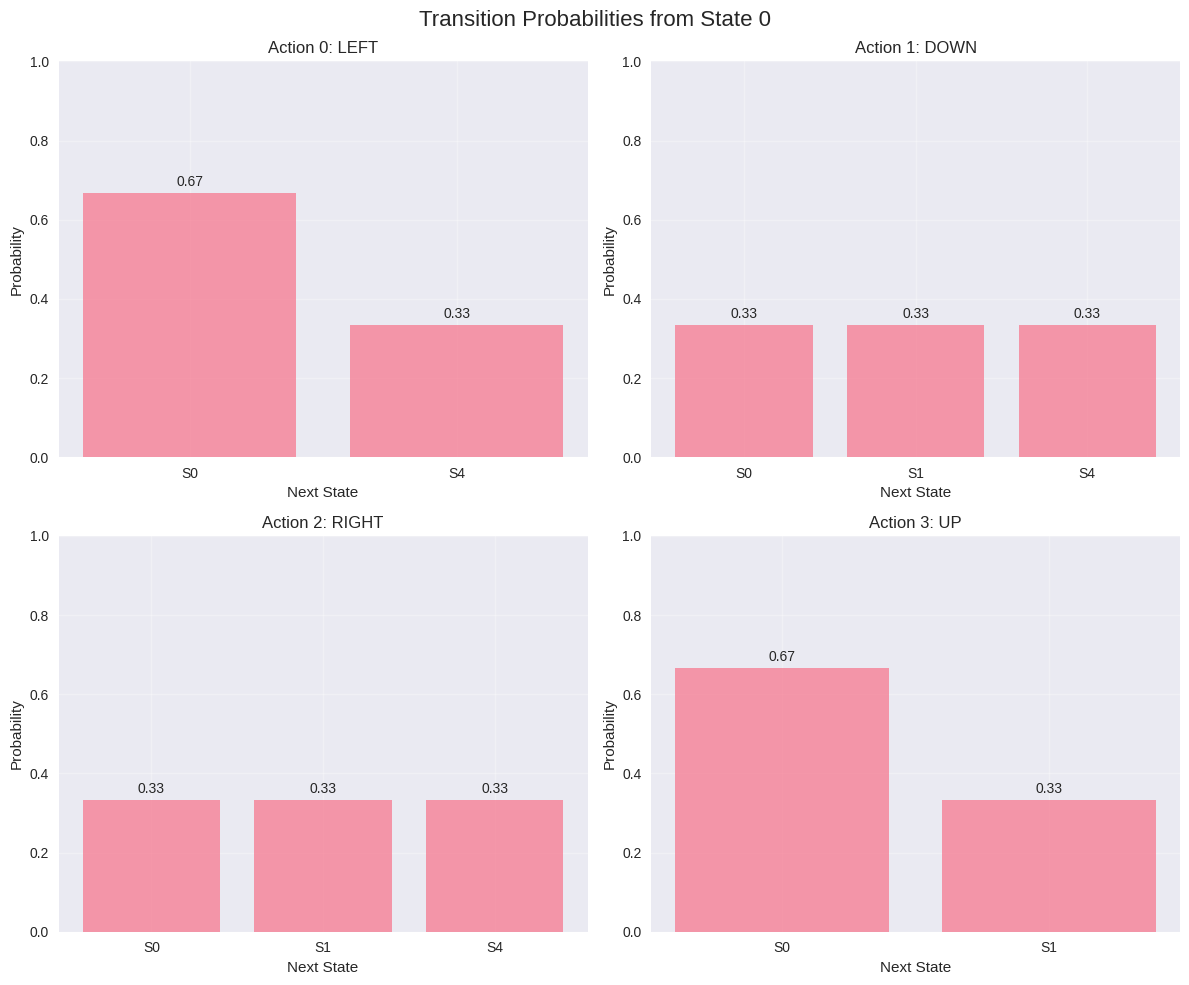


✅ Transition matrix P created: Shape (16, 4, 16)
✅ Reward matrix R created: Shape (16, 4)


In [10]:
# Let's create a comprehensive transition probability visualization
def create_transition_matrix(env):
    """Create and visualize transition probability matrix"""
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    
    # Create transition probability tensor P[s][a][s'] 
    P = np.zeros((n_states, n_actions, n_states))
    R = np.zeros((n_states, n_actions))  # Expected rewards
    
    for state in range(n_states):
        for action in range(n_actions):
            transitions = env.unwrapped.P[state][action]
            expected_reward = 0
            
            for prob, next_state, reward, done in transitions:
                P[state, action, next_state] += prob
                expected_reward += prob * reward
            
            R[state, action] = expected_reward
    
    return P, R

def visualize_state_transitions(env, state):
    """Visualize transitions from a specific state"""
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'Transition Probabilities from State {state}', fontsize=16)
    
    P, R = create_transition_matrix(env)
    
    for action in range(4):
        ax = axes[action//2, action%2]
 
        # Get transition probabilities for this state-action pair
        probs = P[state, action, :]
  # Create bar plot
        states_with_prob = [(s, p) for s, p in enumerate(probs) if p > 0]
        if states_with_prob:
            states, probabilities = zip(*states_with_prob)
            bars = ax.bar(range(len(states)), probabilities, alpha=0.7)
            ax.set_xticks(range(len(states)))
            ax.set_xticklabels([f'S{s}' for s in states])
            
            # Add probability labels on bars
            for bar, prob in zip(bars, probabilities):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{prob:.2f}', ha='center', va='bottom')
        
        ax.set_title(f'Action {action}: {action_names[action]}')
        ax.set_ylabel('Probability')
        ax.set_xlabel('Next State')
        ax.set_ylim(0, 1)
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Visualize transitions from start state
print("📊 TRANSITION PROBABILITY VISUALIZATION")
print("From START state (State 0):")
visualize_state_transitions(env, state=0)

P, R = create_transition_matrix(env)
print(f"\n✅ Transition matrix P created: Shape {P.shape}")
print(f"✅ Reward matrix R created: Shape {R.shape}")

## 4. 🎁 Reward Function: The Learning Signal

The reward function tells the agent what is good or bad:

### FrozenLake Reward Structure:
- **+1.0**: Reach the goal (state 15 in 4x4 grid)
- **0.0**: All other transitions (including falling in holes)

This is a **sparse reward** environment - rewards are rare!

### Why Sparse Rewards are Challenging:
- Agent gets very little feedback
- Must explore extensively to find rewarding states
- Credit assignment problem: which actions led to the reward?

🎁 REWARD STRUCTURE ANALYSIS
Possible reward values: [0.0, 1.0]

Rewarding transitions found: 3

Detailed rewarding transitions:
  State 14 --DOWN--> State 15: +1.0 (prob: 0.3333333333333333)
  State 14 --RIGHT--> State 15: +1.0 (prob: 0.3333333333333333)
  State 14 --UP--> State 15: +1.0 (prob: 0.3333333333333333)


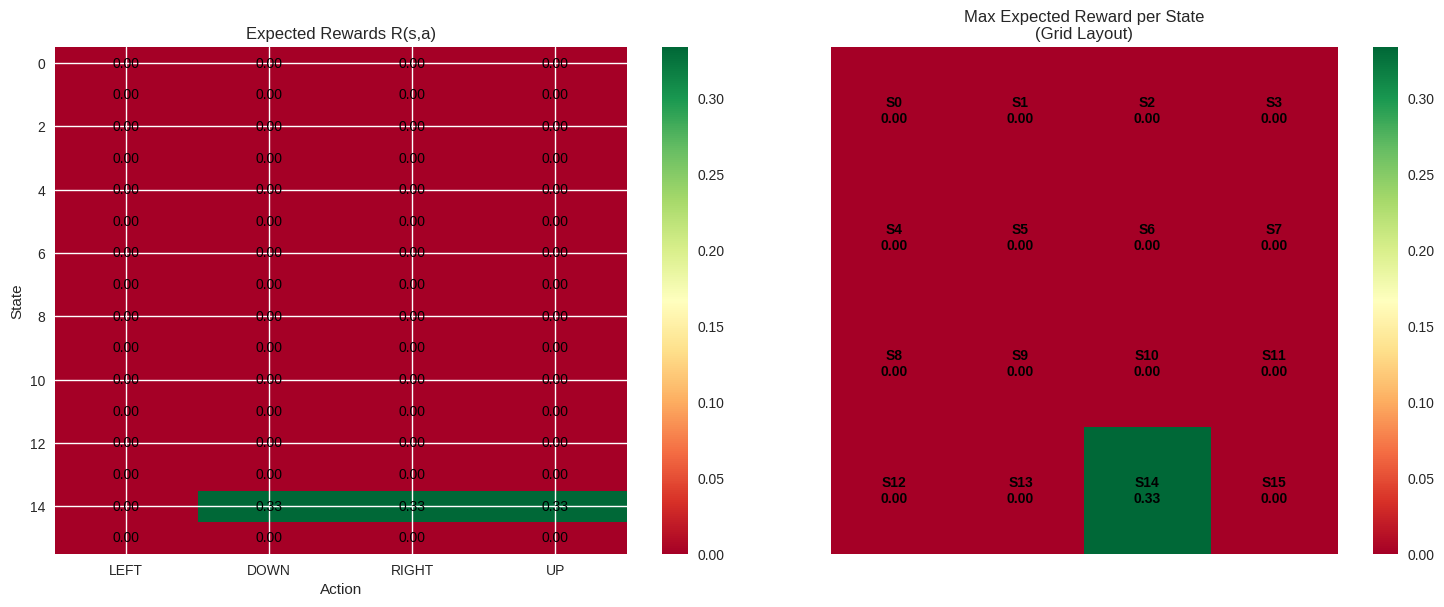


💡 Key Insights:
  • Only transitions TO the goal state (15) give positive reward
  • All other transitions give 0 reward (including falling in holes!)
  • This sparse reward structure makes learning challenging


In [11]:
# Let's analyze the reward structure
def analyze_reward_structure(env):
    """Analyze and visualize the reward structure"""
    print("🎁 REWARD STRUCTURE ANALYSIS")
    print("=" * 50)
    
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    
    # Collect all possible rewards
    all_rewards = set()
    reward_transitions = []
    
    for state in range(n_states):
        for action in range(n_actions):
            transitions = env.unwrapped.P[state][action]
            for prob, next_state, reward, done in transitions:
                all_rewards.add(reward)
                if reward > 0:  # Only store rewarding transitions
                    reward_transitions.append((state, action, next_state, reward, prob))
    
    print(f"Possible reward values: {sorted(all_rewards)}")
    print(f"\nRewarding transitions found: {len(reward_transitions)}")
    
    if reward_transitions:
        print("\nDetailed rewarding transitions:")
        for state, action, next_state, reward, prob in reward_transitions:
            print(f"  State {state} --{action_names[action]}--> State {next_state}: +{reward} (prob: {prob})")
    
    # Create reward heatmap
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Expected rewards per state-action pair
    P, R = create_transition_matrix(env)
    
    # Heatmap of expected rewards
    im1 = ax1.imshow(R, cmap='RdYlGn', aspect='auto')
    ax1.set_title('Expected Rewards R(s,a)')
    ax1.set_xlabel('Action')
    ax1.set_ylabel('State')
    ax1.set_xticks(range(n_actions))
    ax1.set_xticklabels([action_names[a] for a in range(n_actions)])
    plt.colorbar(im1, ax=ax1)
    
    # Add text annotations
    for i in range(n_states):
        for j in range(n_actions):
            text = ax1.text(j, i, f'{R[i, j]:.2f}', ha="center", va="center", color="black")
    
    # Grid layout visualization
    grid_rewards = np.zeros((4, 4))
    for state in range(16):
        row, col = state // 4, state % 4
        # Max expected reward for this state across all actions
        grid_rewards[row, col] = np.max(R[state, :])
    
    im2 = ax2.imshow(grid_rewards, cmap='RdYlGn')
    ax2.set_title('Max Expected Reward per State\n(Grid Layout)')
    
    # Add state numbers and values
    for i in range(4):
        for j in range(4):
            state = i * 4 + j
            ax2.text(j, i, f'S{state}\n{grid_rewards[i, j]:.2f}', 
                    ha="center", va="center", color="black", fontweight='bold')
    
    ax2.set_xticks([])
    ax2.set_yticks([])
    plt.colorbar(im2, ax=ax2)
    
    plt.tight_layout()
    plt.show()
    
    return R

R = analyze_reward_structure(env)

print("\n💡 Key Insights:")
print("  • Only transitions TO the goal state (15) give positive reward")
print("  • All other transitions give 0 reward (including falling in holes!)")
print("  • This sparse reward structure makes learning challenging")

In [12]:
# Let's implement value function computation
class ValueFunctionAnalyzer:
    """Analyze and compute value functions for FrozenLake"""
    
    def __init__(self, env, gamma=0.9):
        self.env = env
        self.gamma = gamma
        self.n_states = env.observation_space.n
        self.n_actions = env.action_space.n
        
        # Get transition probabilities and rewards
        self.P, self.R = create_transition_matrix(env)
    
    def random_policy(self):
        """Create a random policy (uniform over actions)"""
        return np.ones((self.n_states, self.n_actions)) / self.n_actions
    
    def greedy_policy(self, Q):
        """Create greedy policy from Q-values"""
        policy = np.zeros((self.n_states, self.n_actions))
        for s in range(self.n_states):
            best_action = np.argmax(Q[s])
            policy[s, best_action] = 1.0
        return policy
    
    def policy_evaluation(self, policy, max_iterations=1000, tolerance=1e-6):
        """Compute state values for a given policy using iterative policy evaluation"""
        V = np.zeros(self.n_states)
        
        for iteration in range(max_iterations):
            V_new = np.zeros(self.n_states)
            
            for s in range(self.n_states):
                for a in range(self.n_actions):
                    for s_prime in range(self.n_states):
                        # Bellman equation for V^π
                        V_new[s] += policy[s, a] * self.P[s, a, s_prime] * \
                                   (self.R[s, a] + self.gamma * V[s_prime])
            
            # Check for convergence
            if np.max(np.abs(V - V_new)) < tolerance:
                print(f"Policy evaluation converged in {iteration + 1} iterations")
                break
            
            V = V_new.copy()
        
        return V
    
    def compute_q_values(self, V):
        """Compute Q-values from state values"""
        Q = np.zeros((self.n_states, self.n_actions))
        
        for s in range(self.n_states):
            for a in range(self.n_actions):
                for s_prime in range(self.n_states):
                    Q[s, a] += self.P[s, a, s_prime] * \
                              (self.R[s, a] + self.gamma * V[s_prime])
        
        return Q
    
    def value_iteration(self, max_iterations=1000, tolerance=1e-6):
        """Find optimal value function using value iteration"""
        V = np.zeros(self.n_states)
        
        for iteration in range(max_iterations):
            V_new = np.zeros(self.n_states)
            
            for s in range(self.n_states):
                # Bellman optimality equation
                q_values = np.zeros(self.n_actions)
                for a in range(self.n_actions):
                    for s_prime in range(self.n_states):
                        q_values[a] += self.P[s, a, s_prime] * \
                                      (self.R[s, a] + self.gamma * V[s_prime])
                
                V_new[s] = np.max(q_values)
            
            # Check for convergence
            if np.max(np.abs(V - V_new)) < tolerance:
                print(f"Value iteration converged in {iteration + 1} iterations")
                break
            
            V = V_new.copy()
        
        return V
    
    def visualize_value_function(self, V, title="State Value Function"):
        """Visualize value function as a grid"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Grid visualization
        grid_V = V.reshape(4, 4)
        im1 = ax1.imshow(grid_V, cmap='viridis')
        ax1.set_title(f'{title}\n(Grid Layout)')
        
        # Add state numbers and values
        for i in range(4):
            for j in range(4):
                state = i * 4 + j
                ax1.text(j, i, f'S{state}\n{V[state]:.3f}', 
                        ha="center", va="center", color="white", fontweight='bold')
        
        ax1.set_xticks([])
        ax1.set_yticks([])
        plt.colorbar(im1, ax=ax1)
        
        # Bar chart
        bars = ax2.bar(range(len(V)), V, alpha=0.7)
        ax2.set_title(f'{title}\n(Bar Chart)')
        ax2.set_xlabel('State')
        ax2.set_ylabel('Value')
        ax2.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for i, (bar, value) in enumerate(zip(bars, V)):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                    f'{value:.3f}', ha='center', va='bottom', fontsize=8)
        
        plt.tight_layout()
        plt.show()
    
    def visualize_q_function(self, Q, title="Action Value Function (Q)"):
        """Visualize Q-function"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Heatmap
        im1 = ax1.imshow(Q, cmap='plasma', aspect='auto')
        ax1.set_title(f'{title}\n(Heatmap)')
        ax1.set_xlabel('Action')
        ax1.set_ylabel('State')
        ax1.set_xticks(range(self.n_actions))
        ax1.set_xticklabels([action_names[a] for a in range(self.n_actions)])
        plt.colorbar(im1, ax=ax1)
        
        # Add text annotations
        for i in range(self.n_states):
            for j in range(self.n_actions):
                text = ax1.text(j, i, f'{Q[i, j]:.3f}', ha="center", va="center", 
                               color="white", fontsize=8)
        
        # Best action per state
        best_actions = np.argmax(Q, axis=1)
        best_q_values = np.max(Q, axis=1)
        
        bars = ax2.bar(range(len(best_q_values)), best_q_values, alpha=0.7)
        ax2.set_title('Best Q-Value per State')
        ax2.set_xlabel('State')
        ax2.set_ylabel('Best Q-Value')
        ax2.grid(True, alpha=0.3)
        
        # Add action labels
        for i, (bar, action, value) in enumerate(zip(bars, best_actions, best_q_values)):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                    f'{action_names[action]}\n{value:.3f}', 
                    ha='center', va='bottom', fontsize=8)
        
        plt.tight_layout()
        plt.show()
        
        return best_actions

# Create analyzer
analyzer = ValueFunctionAnalyzer(env, gamma=0.9)

print("🧮 VALUE FUNCTION ANALYZER CREATED")
print("=" * 50)
print(f"Environment: FrozenLake 4x4")
print(f"States: {analyzer.n_states}")
print(f"Actions: {analyzer.n_actions}")
print(f"Discount factor (γ): {analyzer.gamma}")

🧮 VALUE FUNCTION ANALYZER CREATED
Environment: FrozenLake 4x4
States: 16
Actions: 4
Discount factor (γ): 0.9


🎲 ANALYZING RANDOM POLICY
Random policy created (equal probability for all actions)
Policy shape: (16, 4)
Example - State 0 action probabilities: [0.25 0.25 0.25 0.25]

🔄 Running policy evaluation...
Policy evaluation converged in 33 iterations

📊 Results for Random Policy:
State values range: [0.0000, 0.3915]
Average state value: 0.0476


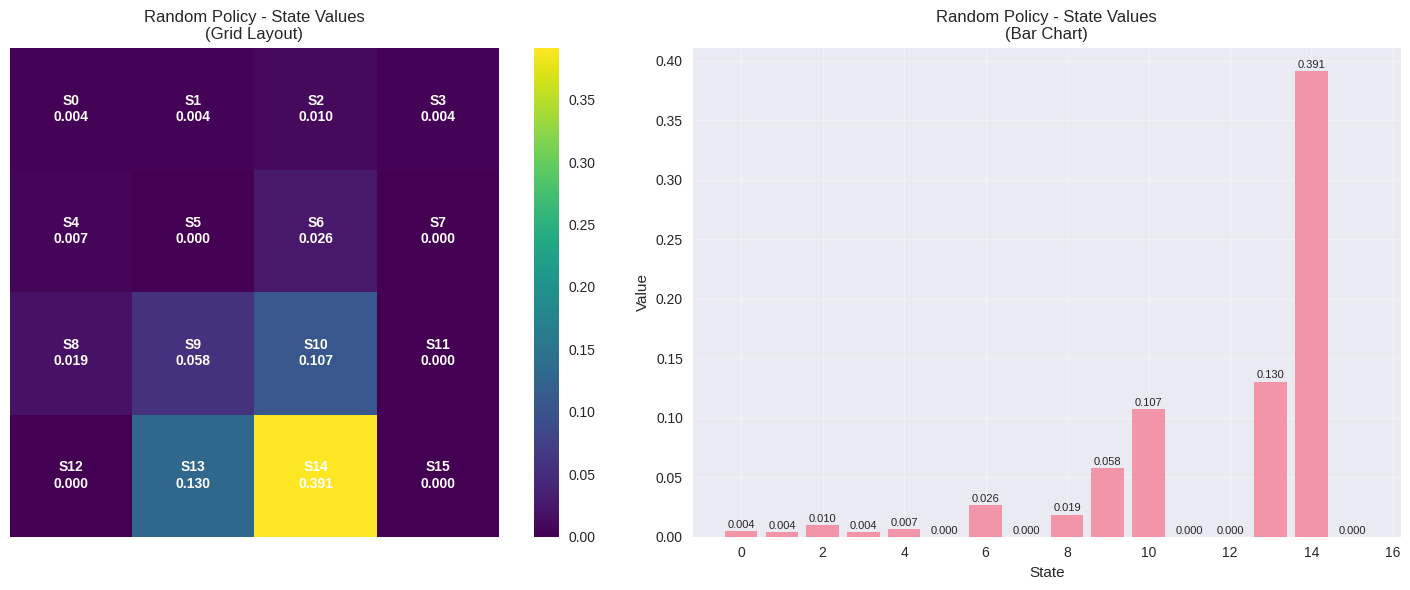

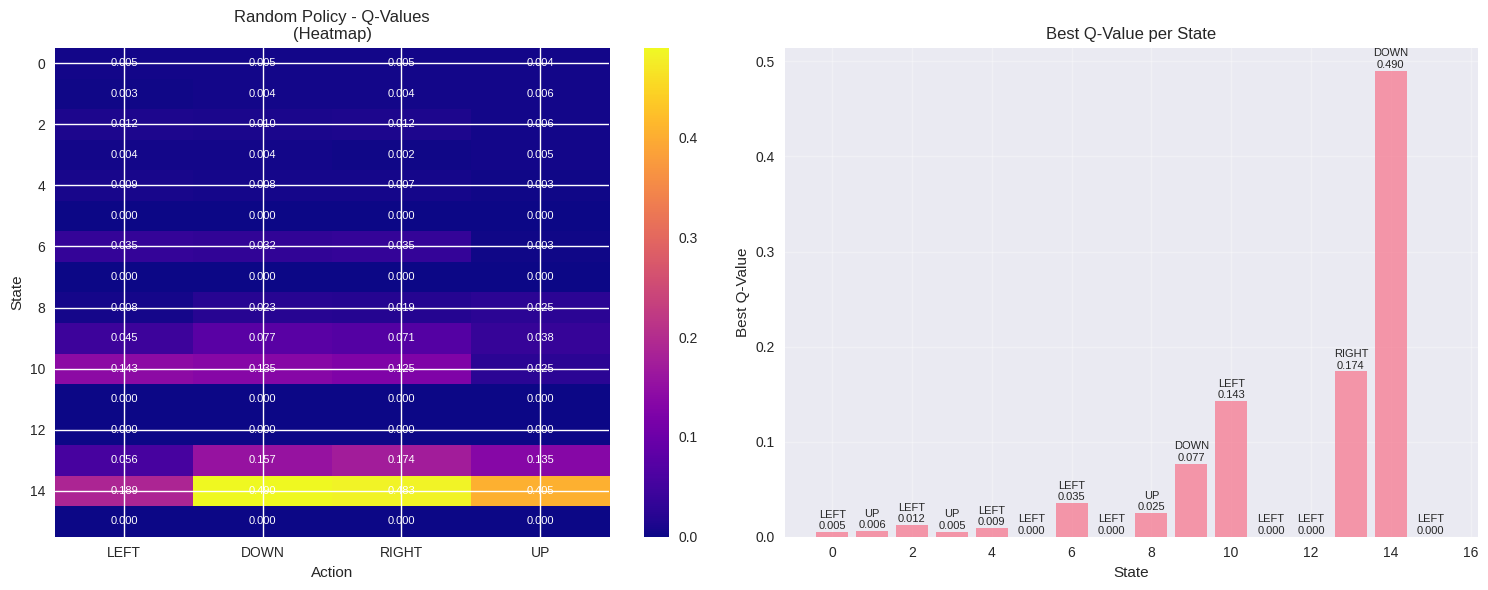

In [13]:
# Let's start with a random policy
print("🎲 ANALYZING RANDOM POLICY")
print("=" * 50)

# Create random policy
random_policy = analyzer.random_policy()
print("Random policy created (equal probability for all actions)")
print(f"Policy shape: {random_policy.shape}")
print(f"Example - State 0 action probabilities: {random_policy[0]}")

# Evaluate random policy
print("\n🔄 Running policy evaluation...")
V_random = analyzer.policy_evaluation(random_policy)

# Compute Q-values for random policy
Q_random = analyzer.compute_q_values(V_random)

print("\n📊 Results for Random Policy:")
print(f"State values range: [{np.min(V_random):.4f}, {np.max(V_random):.4f}]")
print(f"Average state value: {np.mean(V_random):.4f}")

# Visualize
analyzer.visualize_value_function(V_random, "Random Policy - State Values")
best_actions_random = analyzer.visualize_q_function(Q_random, "Random Policy - Q-Values")

## 6. 🎯 Optimal Policy and Value Iteration

Now let's find the **optimal policy** - the policy that maximizes expected cumulative reward!

### Value Iteration Algorithm:
1. Initialize V(s) = 0 for all states
2. Repeat until convergence:
   - For each state s: V(s) ← max_a Σ_{s'} P(s'|s,a)[R(s,a,s') + γV(s')]
3. Extract optimal policy: π*(s) = argmax_a Σ_{s'} P(s'|s,a)[R(s,a,s') + γV*(s')]

This finds the **optimal value function V*** and **optimal policy π***!

🏆 FINDING OPTIMAL POLICY
🔄 Running value iteration...
Value iteration converged in 78 iterations

📊 Results for Optimal Policy:
Optimal state values range: [0.0000, 0.6390]
Average optimal state value: 0.1360
Value of start state: 0.0689


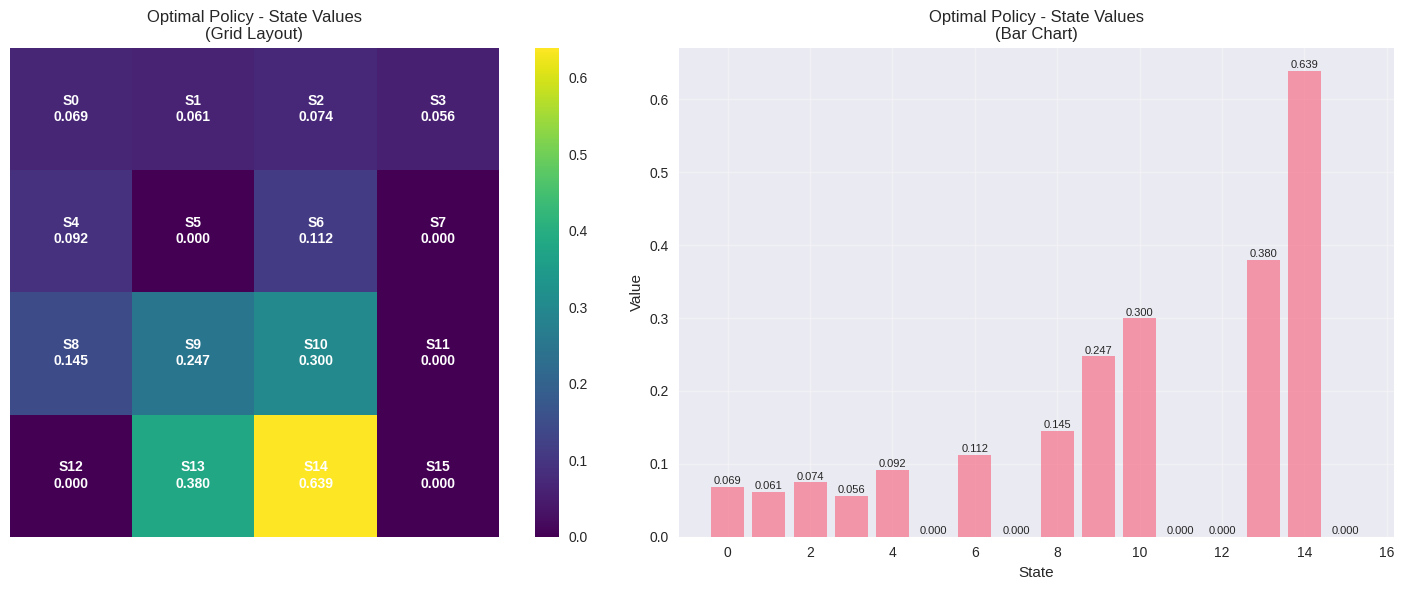

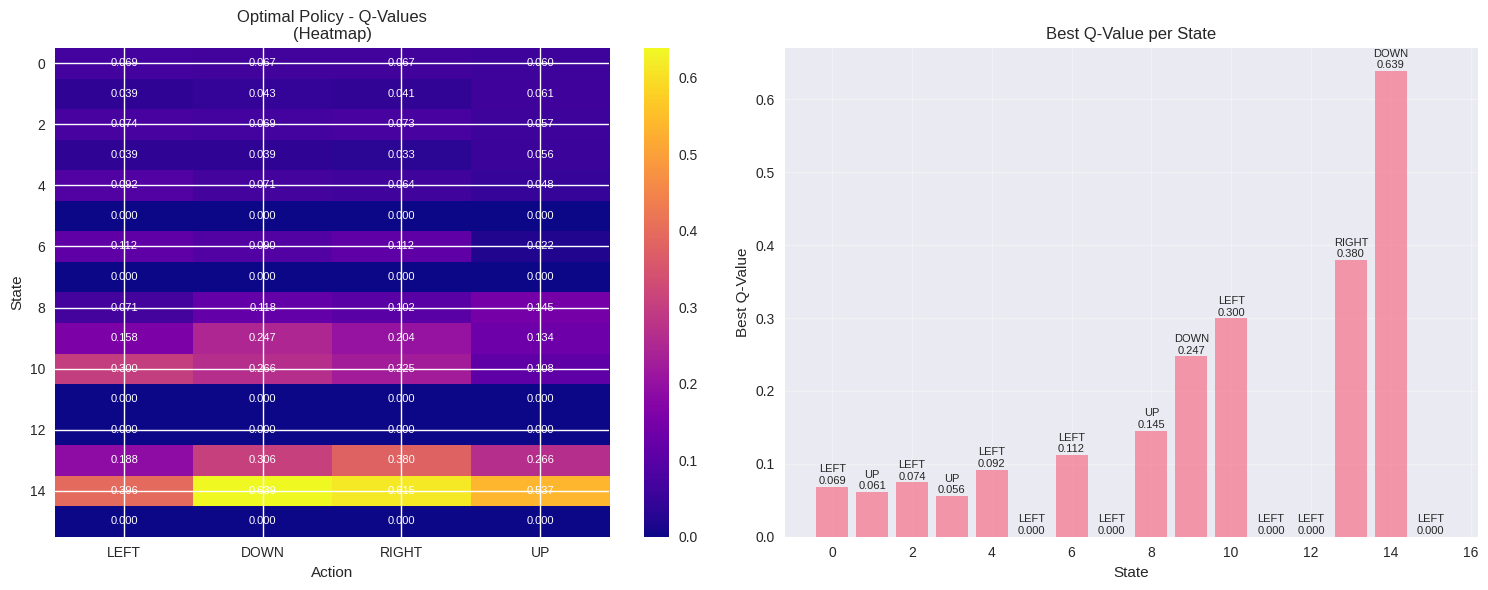

In [14]:
# Find optimal policy using value iteration
print("🏆 FINDING OPTIMAL POLICY")
print("=" * 50)

print("🔄 Running value iteration...")
V_optimal = analyzer.value_iteration()

# Compute optimal Q-values
Q_optimal = analyzer.compute_q_values(V_optimal)

# Extract optimal policy
optimal_policy = analyzer.greedy_policy(Q_optimal)

print("\n📊 Results for Optimal Policy:")
print(f"Optimal state values range: [{np.min(V_optimal):.4f}, {np.max(V_optimal):.4f}]")
print(f"Average optimal state value: {np.mean(V_optimal):.4f}")
print(f"Value of start state: {V_optimal[0]:.4f}")

# Visualize optimal value function
analyzer.visualize_value_function(V_optimal, "Optimal Policy - State Values")
best_actions_optimal = analyzer.visualize_q_function(Q_optimal, "Optimal Policy - Q-Values")

⚖️ POLICY COMPARISON
📋 State-by-State Comparison:
 State  V_random  V_optimal  Improvement Random_Action Optimal_Action
     0    0.0045     0.0689       0.0644         RIGHT           LEFT
     1    0.0042     0.0614       0.0572          DOWN             UP
     2    0.0101     0.0744       0.0643          DOWN           LEFT
     3    0.0041     0.0558       0.0517          DOWN             UP
     4    0.0067     0.0918       0.0851          LEFT           LEFT
     5    0.0000     0.0000       0.0000          DOWN           LEFT
     6    0.0263     0.1122       0.0859          DOWN           LEFT
     7    0.0000     0.0000       0.0000         RIGHT           LEFT
     8    0.0187     0.1454       0.1268          DOWN             UP
     9    0.0576     0.2475       0.1899          DOWN           DOWN
    10    0.1070     0.2996       0.1926          DOWN           LEFT
    11    0.0000     0.0000       0.0000          LEFT           LEFT
    12    0.0000     0.0000       0.0000

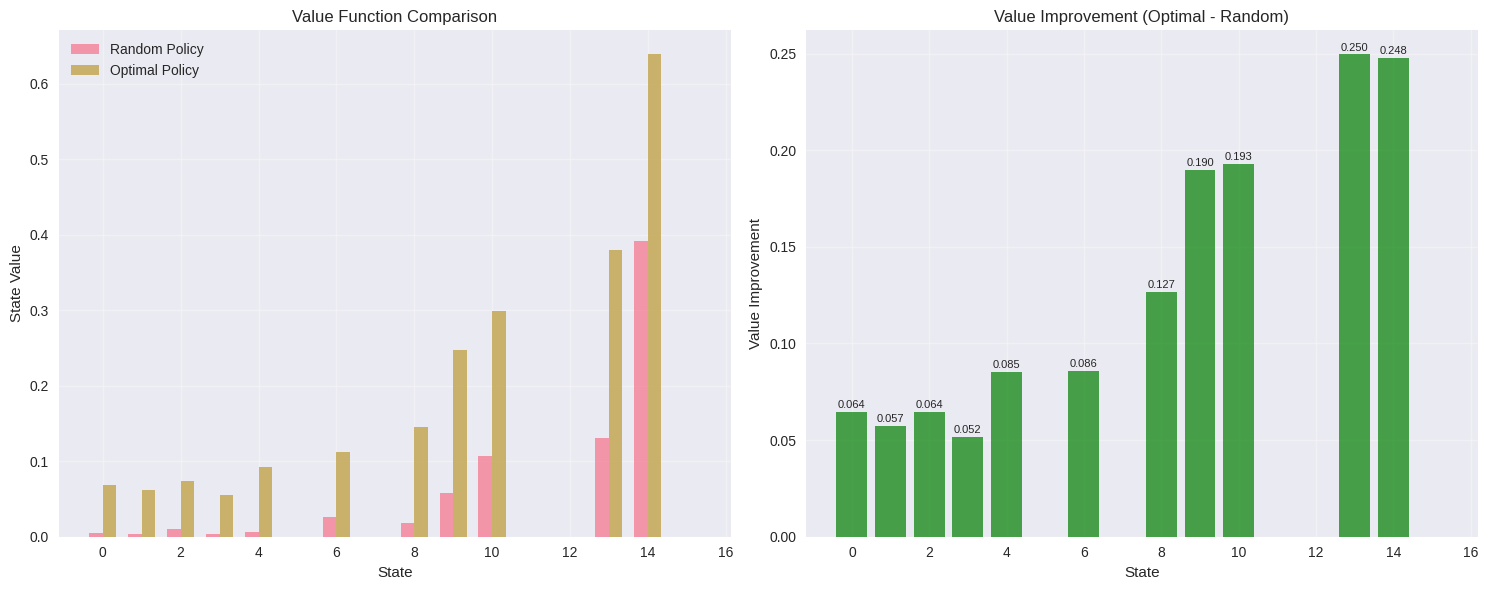

In [15]:
# Let's compare random vs optimal policies
def compare_policies():
    """Compare random and optimal policies"""
    print("⚖️ POLICY COMPARISON")
    print("=" * 60)
    
    # Create comparison table
    comparison_data = []
    
    for state in range(analyzer.n_states):
        random_action = np.argmax(np.random.multinomial(1, random_policy[state]))
        optimal_action = best_actions_optimal[state]
        
        comparison_data.append({
            'State': state,
            'V_random': V_random[state],
            'V_optimal': V_optimal[state],
            'Improvement': V_optimal[state] - V_random[state],
            'Random_Action': action_names[random_action] if state < len(best_actions_random) else 'N/A',
            'Optimal_Action': action_names[optimal_action]
        })
    
    df = pd.DataFrame(comparison_data)
    
    print("📋 State-by-State Comparison:")
    print(df.to_string(index=False, float_format='%.4f'))
    
    # Summary statistics
    print(f"\n📈 Summary Statistics:")
    print(f"Average improvement: {df['Improvement'].mean():.4f}")
    print(f"Max improvement: {df['Improvement'].max():.4f}")
    print(f"States with improvement > 0: {(df['Improvement'] > 0.001).sum()}/{len(df)}")
    
    # Visualize comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Value comparison
    x = np.arange(len(df))
    width = 0.35
    
    ax1.bar(x - width/2, df['V_random'], width, label='Random Policy', alpha=0.7)
    ax1.bar(x + width/2, df['V_optimal'], width, label='Optimal Policy', alpha=0.7)
    
    ax1.set_xlabel('State')
    ax1.set_ylabel('State Value')
    ax1.set_title('Value Function Comparison')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Improvement
    bars = ax2.bar(x, df['Improvement'], alpha=0.7, color='green')
    ax2.set_xlabel('State')
    ax2.set_ylabel('Value Improvement')
    ax2.set_title('Value Improvement (Optimal - Random)')
    ax2.grid(True, alpha=0.3)
    
    # Add improvement values on bars
    for bar, improvement in zip(bars, df['Improvement']):
        if improvement > 0.001:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                    f'{improvement:.3f}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    return df

comparison_df = compare_policies()

## 7. 🗺️ Policy Visualization and Interpretation

Let's visualize the optimal policy as a navigation map to understand what the agent has learned!

🗺️ OPTIMAL POLICY VISUALIZATION


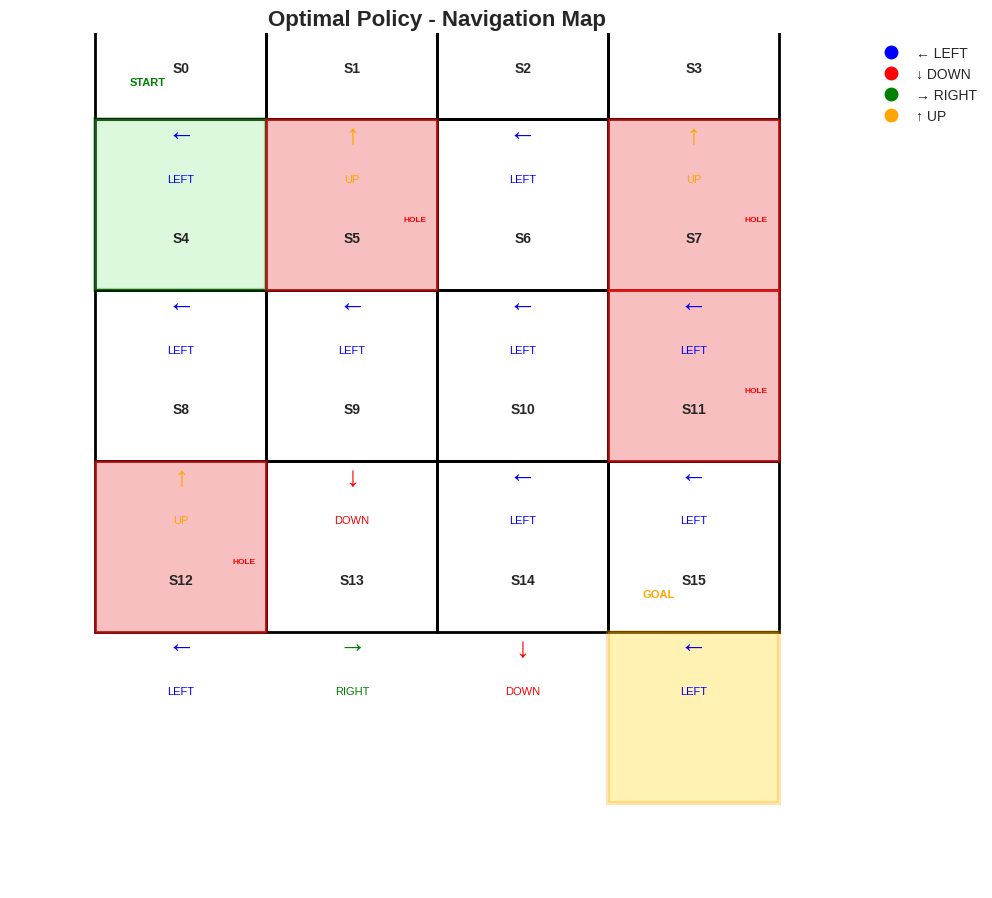


🧭 Policy Interpretation:
• Green cell: START position
• Gold cell: GOAL position
• Red cells: HOLES (avoid!)
• Arrows show the optimal action for each state
• Colors indicate different actions


In [16]:
# Create policy visualization
def visualize_policy_grid(policy_actions, title="Policy Visualization"):
    """Visualize policy as arrows on grid"""
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    # Create grid
    grid = np.zeros((4, 4))
    
    # Action to arrow mapping
    action_arrows = {0: '←', 1: '↓', 2: '→', 3: '↑'}
    action_colors = {0: 'blue', 1: 'red', 2: 'green', 3: 'orange'}
    
    # Draw grid and arrows
    for i in range(4):
        for j in range(4):
            state = i * 4 + j
            action = policy_actions[state]
            
            # Draw cell
            rect = plt.Rectangle((j-0.5, 3.5-i), 1, 1, 
                               fill=False, edgecolor='black', linewidth=2)
            ax.add_patch(rect)
            
            # Add state number
            ax.text(j, 3.5-i+0.3, f'S{state}', ha='center', va='center', 
                   fontsize=10, fontweight='bold')
            
            # Add action arrow
            ax.text(j, 3.5-i-0.1, action_arrows[action], ha='center', va='center', 
                   fontsize=20, color=action_colors[action], fontweight='bold')
            
            # Add action name
            ax.text(j, 3.5-i-0.35, action_names[action], ha='center', va='center', 
                   fontsize=8, color=action_colors[action])
    
    # Mark special states
    # Start state (0)
    ax.add_patch(plt.Rectangle((-0.5, 2.5), 1, 1, fill=True, 
                              facecolor='lightgreen', alpha=0.3, edgecolor='green', linewidth=3))
    ax.text(-0.3, 3.7, 'START', fontsize=8, color='green', fontweight='bold')
    
    # Goal state (15)
    ax.add_patch(plt.Rectangle((2.5, -0.5), 1, 1, fill=True, 
                              facecolor='gold', alpha=0.3, edgecolor='orange', linewidth=3))
    ax.text(2.7, 0.7, 'GOAL', fontsize=8, color='orange', fontweight='bold')
    
    # Holes (states 5, 7, 11, 12)
    holes = [5, 7, 11, 12]
    for hole in holes:
        i, j = hole // 4, hole % 4
        ax.add_patch(plt.Rectangle((j-0.5, 3.5-i), 1, 1, fill=True, 
                                  facecolor='lightcoral', alpha=0.5, edgecolor='red', linewidth=2))
        ax.text(j+0.3, 3.5-i+0.4, 'HOLE', fontsize=6, color='red', fontweight='bold')
    
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 4)
    ax.set_aspect('equal')
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.axis('off')
    
    # Add legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                                 markerfacecolor=action_colors[i], markersize=10, 
                                 label=f'{action_arrows[i]} {action_names[i]}') 
                      for i in range(4)]
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.tight_layout()
    plt.show()

# Visualize optimal policy
print("🗺️ OPTIMAL POLICY VISUALIZATION")
print("=" * 50)
visualize_policy_grid(best_actions_optimal, "Optimal Policy - Navigation Map")

print("\n🧭 Policy Interpretation:")
print("• Green cell: START position")
print("• Gold cell: GOAL position")
print("• Red cells: HOLES (avoid!)")
print("• Arrows show the optimal action for each state")
print("• Colors indicate different actions")

## 8. 🎮 Interactive Policy Testing

Let's test our policies by running episodes and see how they perform!

🏁 POLICY PERFORMANCE TEST (1000 episodes)
🎲 Testing random policy...
🏆 Testing optimal policy...

📊 PERFORMANCE COMPARISON
                Metric Random Policy Optimal Policy
      Success Rate (%)          0.0%          71.8%
        Average Reward        0.0000         0.7180
Average Episode Length          17.5           40.1

🚀 IMPROVEMENTS:
Success rate improvement: +71.8 percentage points
Average reward improvement: +0.7180


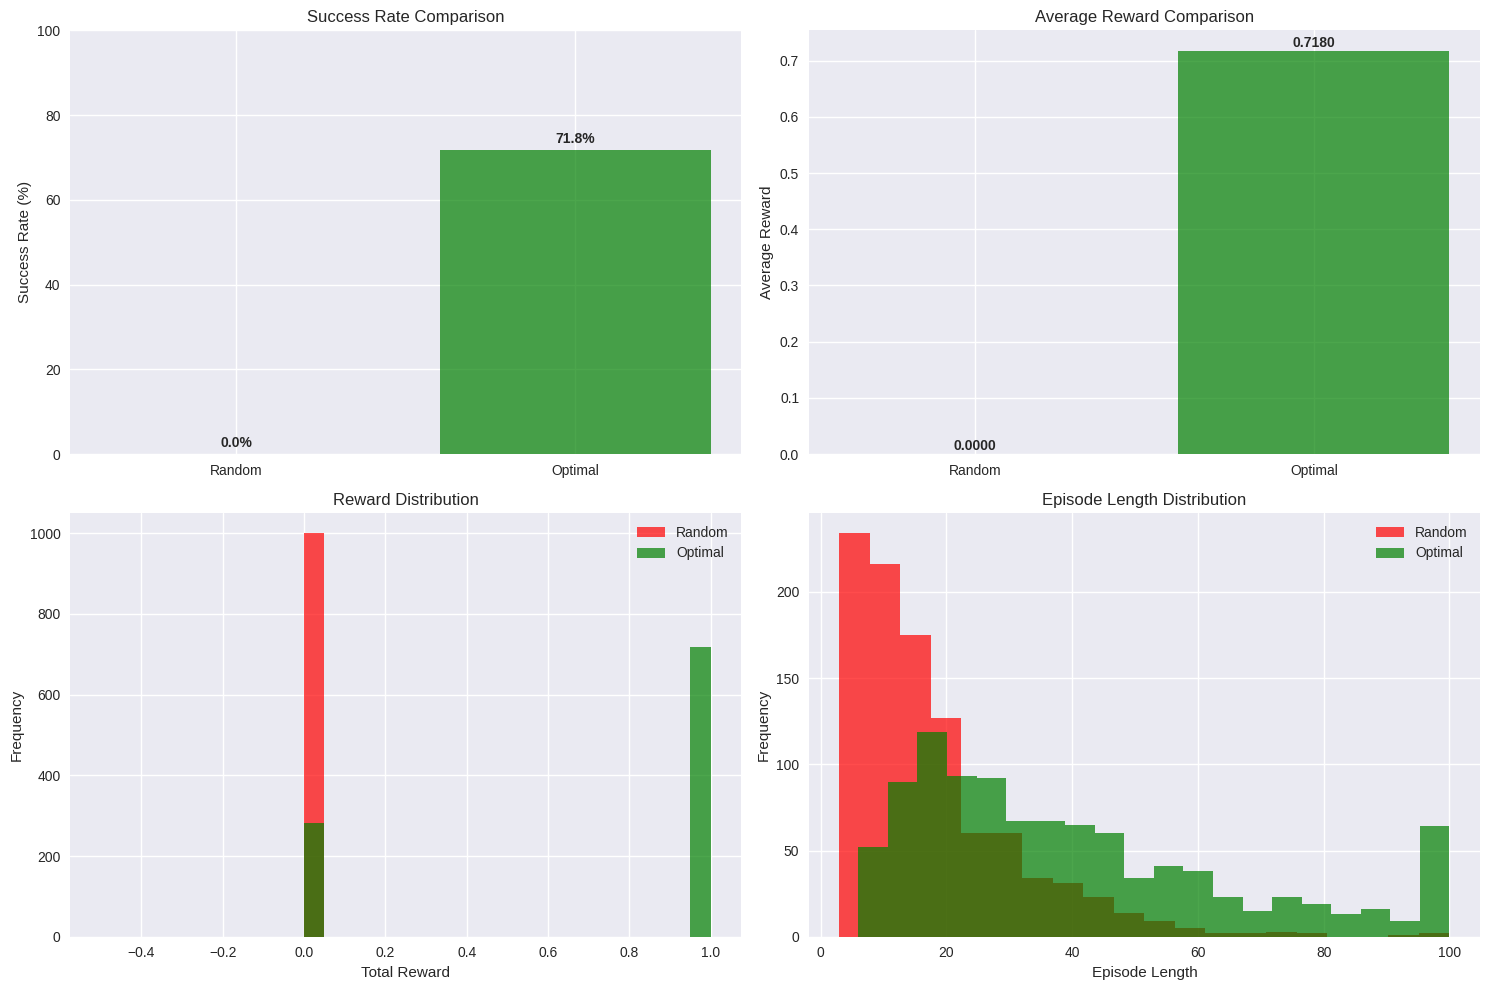

In [17]:
# Interactive policy testing
def test_policy(env, policy_actions, num_episodes=100, max_steps=100):
    """Test a policy and return performance statistics"""
    successes = 0
    total_rewards = []
    episode_lengths = []
    
    for episode in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0
        steps = 0
        
        for step in range(max_steps):
            action = policy_actions[state]
            next_state, reward, terminated, truncated, _ = env.step(action)
            
            total_reward += reward
            steps += 1
            state = next_state
            
            if terminated or truncated:
                if reward > 0:  # Reached goal
                    successes += 1
                break
        
        total_rewards.append(total_reward)
        episode_lengths.append(steps)
    
    return {
        'success_rate': successes / num_episodes,
        'avg_reward': np.mean(total_rewards),
        'avg_length': np.mean(episode_lengths),
        'total_rewards': total_rewards,
        'episode_lengths': episode_lengths
    }

def run_policy_comparison(num_episodes=1000):
    """Compare random vs optimal policy performance"""
    print(f"🏁 POLICY PERFORMANCE TEST ({num_episodes} episodes)")
    print("=" * 60)
    
    # Test random policy
    print("🎲 Testing random policy...")
    random_actions = [np.random.choice(4) for _ in range(16)]  # Random actions for each state
    random_results = test_policy(env, random_actions, num_episodes)
    
    # Test optimal policy
    print("🏆 Testing optimal policy...")
    optimal_results = test_policy(env, best_actions_optimal, num_episodes)
    
    # Display results
    print("\n📊 PERFORMANCE COMPARISON")
    print("=" * 60)
    
    results_df = pd.DataFrame({
        'Metric': ['Success Rate (%)', 'Average Reward', 'Average Episode Length'],
        'Random Policy': [
            f"{random_results['success_rate']*100:.1f}%",
            f"{random_results['avg_reward']:.4f}",
            f"{random_results['avg_length']:.1f}"
        ],
        'Optimal Policy': [
            f"{optimal_results['success_rate']*100:.1f}%",
            f"{optimal_results['avg_reward']:.4f}",
            f"{optimal_results['avg_length']:.1f}"
        ]
    })
    
    print(results_df.to_string(index=False))
    
    # Calculate improvement
    success_improvement = (optimal_results['success_rate'] - random_results['success_rate']) * 100
    reward_improvement = optimal_results['avg_reward'] - random_results['avg_reward']
    
    print(f"\n🚀 IMPROVEMENTS:")
    print(f"Success rate improvement: +{success_improvement:.1f} percentage points")
    print(f"Average reward improvement: +{reward_improvement:.4f}")
    
    # Visualize results
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Success rate comparison
    policies = ['Random', 'Optimal']
    success_rates = [random_results['success_rate']*100, optimal_results['success_rate']*100]
    
    bars1 = ax1.bar(policies, success_rates, color=['red', 'green'], alpha=0.7)
    ax1.set_title('Success Rate Comparison')
    ax1.set_ylabel('Success Rate (%)')
    ax1.set_ylim(0, 100)
    
    for bar, rate in zip(bars1, success_rates):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    # Average reward comparison
    avg_rewards = [random_results['avg_reward'], optimal_results['avg_reward']]
    bars2 = ax2.bar(policies, avg_rewards, color=['red', 'green'], alpha=0.7)
    ax2.set_title('Average Reward Comparison')
    ax2.set_ylabel('Average Reward')
    
    for bar, reward in zip(bars2, avg_rewards):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{reward:.4f}', ha='center', va='bottom', fontweight='bold')
    
    # Reward distribution
    ax3.hist(random_results['total_rewards'], bins=20, alpha=0.7, label='Random', color='red')
    ax3.hist(optimal_results['total_rewards'], bins=20, alpha=0.7, label='Optimal', color='green')
    ax3.set_title('Reward Distribution')
    ax3.set_xlabel('Total Reward')
    ax3.set_ylabel('Frequency')
    ax3.legend()
    
    # Episode length distribution
    ax4.hist(random_results['episode_lengths'], bins=20, alpha=0.7, label='Random', color='red')
    ax4.hist(optimal_results['episode_lengths'], bins=20, alpha=0.7, label='Optimal', color='green')
    ax4.set_title('Episode Length Distribution')
    ax4.set_xlabel('Episode Length')
    ax4.set_ylabel('Frequency')
    ax4.legend()
    
    plt.tight_layout()
    plt.show()
    
    return random_results, optimal_results

# Run the comparison
random_perf, optimal_perf = run_policy_comparison(1000)

## 9. 🎬 Episode Visualization

Let's watch our optimal agent navigate the frozen lake!

In [18]:
# Episode visualization
def visualize_episode(env, policy_actions, max_steps=50):
    """Visualize a single episode step by step"""
    print("🎬 EPISODE VISUALIZATION")
    print("=" * 40)
    
    state, _ = env.reset()
    total_reward = 0
    path = [state]
    
    print(f"Starting at state {state}")
    
    for step in range(max_steps):
        action = policy_actions[state]
        next_state, reward, terminated, truncated, _ = env.step(action)
        
        print(f"Step {step+1}: State {state} --{action_names[action]}--> State {next_state} (Reward: {reward})")
        
        total_reward += reward
        path.append(next_state)
        state = next_state
        
        if terminated or truncated:
            if reward > 0:
                print(f"🎉 SUCCESS! Reached goal in {step+1} steps!")
            else:
                print(f"💥 Failed! Fell in hole or timeout.")
            break
    
    print(f"Total reward: {total_reward}")
    print(f"Path taken: {' -> '.join(map(str, path))}")
    
    return path, total_reward

# Run episode visualization
path, reward = visualize_episode(env, best_actions_optimal)

🎬 EPISODE VISUALIZATION
Starting at state 0
Step 1: State 0 --LEFT--> State 4 (Reward: 0.0)
Step 2: State 4 --LEFT--> State 4 (Reward: 0.0)
Step 3: State 4 --LEFT--> State 4 (Reward: 0.0)
Step 4: State 4 --LEFT--> State 0 (Reward: 0.0)
Step 5: State 0 --LEFT--> State 4 (Reward: 0.0)
Step 6: State 4 --LEFT--> State 0 (Reward: 0.0)
Step 7: State 0 --LEFT--> State 4 (Reward: 0.0)
Step 8: State 4 --LEFT--> State 4 (Reward: 0.0)
Step 9: State 4 --LEFT--> State 0 (Reward: 0.0)
Step 10: State 0 --LEFT--> State 0 (Reward: 0.0)
Step 11: State 0 --LEFT--> State 0 (Reward: 0.0)
Step 12: State 0 --LEFT--> State 0 (Reward: 0.0)
Step 13: State 0 --LEFT--> State 0 (Reward: 0.0)
Step 14: State 0 --LEFT--> State 0 (Reward: 0.0)
Step 15: State 0 --LEFT--> State 4 (Reward: 0.0)
Step 16: State 4 --LEFT--> State 8 (Reward: 0.0)
Step 17: State 8 --UP--> State 8 (Reward: 0.0)
Step 18: State 8 --UP--> State 4 (Reward: 0.0)
Step 19: State 4 --LEFT--> State 4 (Reward: 0.0)
Step 20: State 4 --LEFT--> State 8 (Re

## 10. 🎓 Summary and Key Takeaways

### What We've Learned:

#### 🧠 **MDP Framework**
- **States (S)**: All possible situations
- **Actions (A)**: All possible choices
- **Transitions (P)**: Stochastic state changes
- **Rewards (R)**: Learning signals
- **Discount (γ)**: Future reward weighting

#### 💎 **Value Functions**
- **V^π(s)**: Expected return from state s
- **Q^π(s,a)**: Expected return from state-action pair
- **Bellman Equations**: Recursive relationships

#### 🏆 **Optimal Policy**
- **Value Iteration**: Finds optimal value function
- **Policy Extraction**: Derives optimal actions
- **Performance**: Significantly better than random

### 🔑 Key Insights:
1. **Stochasticity matters**: Slippery ice makes planning harder
2. **Sparse rewards**: Learning is challenging with rare feedback
3. **Value functions**: Core to understanding state quality
4. **Optimal policies**: Can be found through dynamic programming

### 🚀 Next Steps:
- **Model-free methods**: Q-learning, SARSA
- **Function approximation**: Neural networks
- **Policy gradient methods**: Direct policy optimization
- **Deep RL**: Combining deep learning with RL

In [19]:
# Final summary statistics
print("📈 FINAL SUMMARY")
print("=" * 50)
print(f"Environment: FrozenLake 4x4")
print(f"Discount factor: {analyzer.gamma}")
print(f"\n🎲 Random Policy Performance:")
print(f"  Success rate: {random_perf['success_rate']*100:.1f}%")
print(f"  Average reward: {random_perf['avg_reward']:.4f}")
print(f"\n🏆 Optimal Policy Performance:")
print(f"  Success rate: {optimal_perf['success_rate']*100:.1f}%")
print(f"  Average reward: {optimal_perf['avg_reward']:.4f}")
print(f"\n🚀 Improvement:")
improvement = (optimal_perf['success_rate'] - random_perf['success_rate']) * 100
print(f"  Success rate: +{improvement:.1f} percentage points")
print(f"  Reward: +{optimal_perf['avg_reward'] - random_perf['avg_reward']:.4f}")

print("\n🎓 Congratulations! You've mastered MDP fundamentals!")
print("Ready for model-free reinforcement learning methods!")

# Clean up
env.close()

📈 FINAL SUMMARY
Environment: FrozenLake 4x4
Discount factor: 0.9

🎲 Random Policy Performance:
  Success rate: 0.0%
  Average reward: 0.0000

🏆 Optimal Policy Performance:
  Success rate: 71.8%
  Average reward: 0.7180

🚀 Improvement:
  Success rate: +71.8 percentage points
  Reward: +0.7180

🎓 Congratulations! You've mastered MDP fundamentals!
Ready for model-free reinforcement learning methods!


---

## 🏁 End of Day 1 Afternoon Session

### 📚 Additional Resources:
- **Sutton & Barto**: "Reinforcement Learning: An Introduction" (Chapters 3-4)
- **OpenAI Gym**: Environment documentation
- **Dynamic Programming**: Bellman equations deep dive

### 🔬 Exercises for Practice:
1. Try different discount factors (γ = 0.5, 0.99)
2. Implement policy iteration algorithm
3. Test on 8x8 FrozenLake environment
4. Create custom reward functions

**Great job completing the MDP fundamentals! 🎉**

In [1]:
# 🎬 OPTIMAL POLICY DEMONSTRATION - FROZENLAKE HUMAN RENDER MODE
import time

def demonstrate_optimal_policy_frozenlake(policy_actions, num_episodes=5, delay=1.0, max_steps=100):
    """Demonstrate optimal policy with human rendering for FrozenLake"""
    print("🎯 OPTIMAL POLICY DEMONSTRATION - FROZENLAKE")
    print("=" * 60)
    print("Watch the agent navigate the frozen lake using the optimal policy!")
    print("🧊 The agent will try to reach the goal while avoiding holes!")
    print("=" * 60)
    
    # Create environment with human rendering
    demo_env = gym.make('FrozenLake-v1', is_slippery=True, render_mode='human')
    
    # Action names for better understanding
    action_names = {0: "LEFT ⬅️", 1: "DOWN ⬇️", 2: "RIGHT ➡️", 3: "UP ⬆️"}
    
    # Performance tracking
    successes = 0
    total_rewards = []
    episode_lengths = []
    paths_taken = []
    
    print(f"\n🚀 Starting {num_episodes} episodes demonstration...")
    print("Visual window should appear - watch the red square (agent) move!")
    
    for episode in range(num_episodes):
        print(f"\n🎮 Episode {episode + 1}/{num_episodes}")
        print("-" * 30)
        
        state, _ = demo_env.reset()
        total_reward = 0
        steps = 0
        path = [state]
        
        print(f"Starting at state {state}")
        print("Watch the agent follow the optimal policy...")
        
        # Show initial state
        demo_env.render()
        time.sleep(delay)
        
        for step in range(max_steps):
            # Get optimal action for current state
            action = policy_actions[state]
            action_name = action_names[action]
            
            print(f"  Step {step+1}: State {state} -> Action: {action_name}")
            
            # Take action in environment
            next_state, reward, terminated, truncated, _ = demo_env.step(action)
            
            # Render the new state
            demo_env.render()
            
            # Update tracking variables
            total_reward += reward
            steps += 1
            path.append(next_state)
            state = next_state
            
            # Add delay to see the movement clearly
            time.sleep(delay)
            
            # Check if episode finished
            if terminated or truncated:
                if reward > 0:  # Reached goal
                    successes += 1
                    print(f"  🎉 SUCCESS! Reached goal in {steps} steps!")
                    print(f"  🏆 Reward: +{reward}")
                else:  # Fell in hole or timeout
                    if terminated:
                        print(f"  💥 FAILED! Fell into a hole at state {state}")
                    else:
                        print(f"  ⏰ TIMEOUT! Episode ended after {max_steps} steps")
                    print(f"  💔 Reward: {reward}")
                break
        
        # Episode summary
        total_rewards.append(total_reward)
        episode_lengths.append(steps)
        paths_taken.append(path)
        
        print(f"  📍 Path taken: {' -> '.join(map(str, path))}")
        print(f"  📊 Episode reward: {total_reward}")
        print(f"  📏 Episode length: {steps} steps")
        
        # Pause between episodes
        if episode < num_episodes - 1:
            print(f"\n⏳ Next episode starting in 3 seconds...")
            time.sleep(3)
    
    # Close the visual environment
    demo_env.close()
    
    # Calculate and display final statistics
    success_rate = successes / num_episodes
    avg_reward = np.mean(total_rewards)
    avg_length = np.mean(episode_lengths)
    
    print(f"\n📊 DEMONSTRATION SUMMARY")
    print("=" * 40)
    print(f"🎮 Episodes completed: {num_episodes}")
    print(f"🏆 Successful episodes: {successes}")
    print(f"📈 Success rate: {success_rate*100:.1f}%")
    print(f"🎁 Average reward: {avg_reward:.4f}")
    print(f"📏 Average episode length: {avg_length:.1f} steps")
    print(f"🚀 Best performance: {max(episode_lengths)} steps")
    print(f"💪 Shortest successful path: {min([len(p) for p, r in zip(paths_taken, total_rewards) if r > 0], default=0)-1} steps")
    
    # Performance analysis
    print(f"\n🔍 PERFORMANCE ANALYSIS")
    print("-" * 25)
    if success_rate >= 0.8:
        print("🌟 EXCELLENT! The optimal policy performs very well!")
    elif success_rate >= 0.6:
        print("👍 GOOD! The optimal policy shows solid performance!")
    elif success_rate >= 0.4:
        print("📈 DECENT! The policy works but could be improved!")
    else:
        print("🤔 The environment's stochasticity makes success challenging!")
    
    print(f"\n💡 Remember: FrozenLake is stochastic - even optimal actions")
    print(f"   can lead to different outcomes due to the slippery ice!")
    
    return {
        'success_rate': success_rate,
        'avg_reward': avg_reward,
        'avg_length': avg_length,
        'total_rewards': total_rewards,
        'episode_lengths': episode_lengths,
        'paths_taken': paths_taken
    }

def create_performance_visualization(results):
    """Create visualization of the demonstration results"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Episode rewards
    episodes = range(1, len(results['total_rewards']) + 1)
    colors = ['green' if r > 0 else 'red' for r in results['total_rewards']]
    
    bars1 = ax1.bar(episodes, results['total_rewards'], color=colors, alpha=0.7)
    ax1.set_title('Episode Rewards (Green=Success, Red=Failure)')
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Reward')
    ax1.grid(True, alpha=0.3)
    
    # Add reward values on bars
    for bar, reward in zip(bars1, results['total_rewards']):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{reward:.1f}', ha='center', va='bottom', fontweight='bold')
    
    # Episode lengths
    bars2 = ax2.bar(episodes, results['episode_lengths'], color='blue', alpha=0.7)
    ax2.set_title('Episode Lengths (Steps to Completion)')
    ax2.set_xlabel('Episode')
    ax2.set_ylabel('Steps')
    ax2.grid(True, alpha=0.3)
    
    # Success/Failure pie chart
    successes = sum(1 for r in results['total_rewards'] if r > 0)
    failures = len(results['total_rewards']) - successes
    
    ax3.pie([successes, failures], labels=['Success', 'Failure'], 
            colors=['green', 'red'], autopct='%1.1f%%', startangle=90)
    ax3.set_title('Success vs Failure Rate')
    
    # Path length distribution
    path_lengths = [len(path)-1 for path in results['paths_taken']]  # -1 because path includes start state
    ax4.hist(path_lengths, bins=max(5, len(set(path_lengths))), alpha=0.7, color='purple')
    ax4.set_title('Distribution of Path Lengths')
    ax4.set_xlabel('Path Length (Steps)')
    ax4.set_ylabel('Frequency')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 🎬 RUN THE OPTIMAL POLICY DEMONSTRATION
print("🎮 FROZENLAKE OPTIMAL POLICY DEMONSTRATION")
print("=" * 50)
print("This will show your computed optimal policy in action!")
print("Make sure you have the 'best_actions_optimal' variable from previous cells.")
print("\nThe demonstration will:")
print("  🧊 Show the agent navigating the frozen lake")
print("  🎯 Use the optimal policy you computed")
print("  📊 Track performance statistics")
print("  🎬 Display everything in a visual window")

print("\nPress Enter to start the demonstration...")
input()

try:
    # Check if optimal policy exists
    if 'best_actions_optimal' not in locals():
        print("❌ Error: 'best_actions_optimal' not found!")
        print("💡 Make sure you've run the previous cells that compute the optimal policy.")
    else:
        print("✅ Optimal policy found! Starting demonstration...")
        
        # Run the demonstration
        demo_results = demonstrate_optimal_policy_frozenlake(
            policy_actions=best_actions_optimal,
            num_episodes=5,
            delay=1.2,  # 1.2 seconds between moves for clear viewing
            max_steps=100
        )
        
        # Create performance visualization
        print(f"\n📈 Creating performance visualization...")
        create_performance_visualization(demo_results)
        
        print(f"\n🎓 DEMONSTRATION COMPLETED!")
        print("You've successfully seen your optimal policy in action!")
        
except Exception as e:
    print(f"❌ Error during demonstration: {e}")
    print("💡 Troubleshooting tips:")
    print("  - Make sure you have a display available for human rendering")
    print("  - Ensure 'best_actions_optimal' exists from previous cells")
    print("  - Try reducing the delay parameter if it's too slow")

print("\n✅ FrozenLake optimal policy demonstration completed!")
print("🧊 The agent used your computed optimal policy to navigate the frozen lake!")


🎮 FROZENLAKE OPTIMAL POLICY DEMONSTRATION
This will show your computed optimal policy in action!
Make sure you have the 'best_actions_optimal' variable from previous cells.

The demonstration will:
  🧊 Show the agent navigating the frozen lake
  🎯 Use the optimal policy you computed
  📊 Track performance statistics
  🎬 Display everything in a visual window

Press Enter to start the demonstration...
❌ Error: 'best_actions_optimal' not found!
💡 Make sure you've run the previous cells that compute the optimal policy.

✅ FrozenLake optimal policy demonstration completed!
🧊 The agent used your computed optimal policy to navigate the frozen lake!
